Use this notebook to generate a plot of the performance of ML models and fine-tuned-CNN on a subset of miRBase. This subset contains the organisms with at least 200 entries in the miRBase dataset.

In [1]:
import pandas as pd

In [2]:
performance_filename = "species200_models_performance.csv"
performance_df = pd.read_csv(performance_filename)

In [3]:
performance_df

,Acronym,fine-tuned-CNN,AverageDT,ConsensusNB,AverageNB
0,cbn,1.000,0.9346,0.9626,94.86
1,ssa,1.000,0.9569,0.9515,92.18
2,mdm,1.000,1.0000,0.9951,99.51
3,aca,0.993,0.9787,0.9716,96.45
4,stu,0.991,0.9464,0.9509,94.20
5,prd,0.990,0.9600,0.9150,90.00
6,mdo,0.985,0.9348,0.9152,89.35
7,hsa,0.984,0.9708,0.8612,82.62
8,ipu,0.982,0.9537,0.9217,90.39
9,aly,0.976,1.0000,0.9951,99.51


In [4]:
sorted_performance_df = performance_df.sort_values(by=['fine-tuned-CNN'], ascending=False)

In [5]:
sorted_performance_df.to_csv("sorted_species200_performance.csv", index=False)

## Generate plot

In [6]:
import matplotlib.pyplot as plt
import matplotlib

In [7]:
matplotlib.rcParams.update({'font.size': 12})
matplotlib.rcParams.update({'font.weight': 'normal'})

In [8]:
x_values = range(1, len(sorted_performance_df) + 1, 1)
fine_tunned_performance = sorted_performance_df['fine-tuned-CNN'].tolist()

In [9]:
species_names = sorted_performance_df['Acronym'].tolist()
x_labels = [name for name in species_names]

<Figure size 432x288 with 0 Axes>

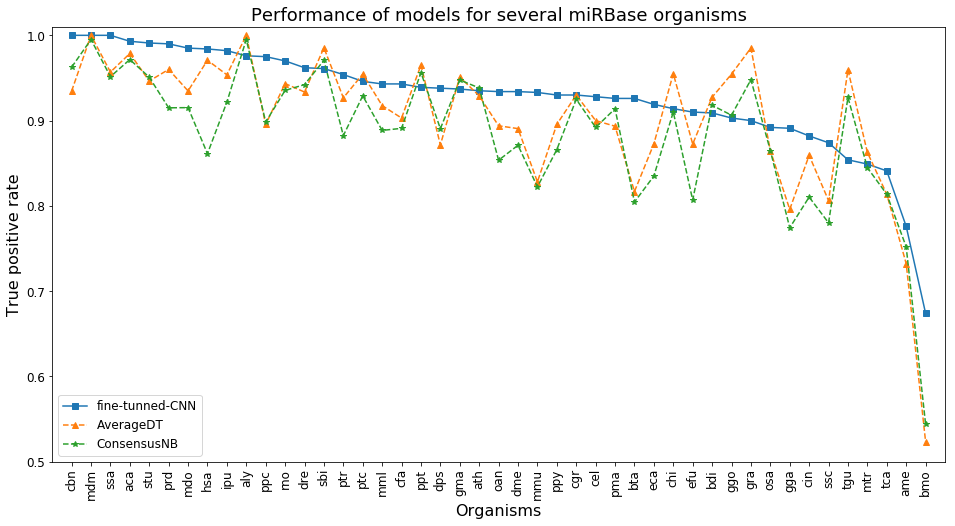

In [10]:
fig = plt.figure()
plt.figure(figsize=(16,8))

plt.plot(x_values, sorted_performance_df['fine-tuned-CNN'].tolist(), linestyle='-', marker='s', label="fine-tunned-CNN")
plt.plot(x_values, sorted_performance_df['AverageDT'].tolist(), linestyle='--', marker='^', label="AverageDT")
plt.plot(x_values, sorted_performance_df['ConsensusNB'].tolist(), linestyle='--', marker='*', label="ConsensusNB")

plt.legend(loc="lower left")

plt.xlabel('Organisms', fontsize=16)
plt.ylabel('True positive rate', fontsize=16)
plt.title('Performance of models for several miRBase organisms', fontsize=18)

plt.xticks(x_values, x_labels, rotation='vertical')
plt.axis([0, 46, 0.50, 1.01])
plt.savefig("species200_performance.png", bbox_inches = 'tight')
plt.show()

## Best model per organism

In [11]:
reduced_df = sorted_performance_df[['Acronym', 'fine-tuned-CNN', 'AverageDT', 'ConsensusNB']]

In [12]:
reduced_df.set_index('Acronym', inplace=True)
reduced_transposed = reduced_df.transpose()

In [13]:
reduced_transposed

Acronym,cbn,mdm,ssa,aca,stu,prd,mdo,hsa,ipu,aly,...,gra,osa,gga,cin,ssc,tgu,mtr,tca,ame,bmo
fine-tuned-CNN,1.0000,1.0000,1.0000,0.9930,0.9910,0.990,0.9850,0.9840,0.9820,0.9760,...,0.9000,0.8920,0.8910,0.8820,0.8740,0.8540,0.8490,0.8410,0.7760,0.6740
AverageDT,0.9346,1.0000,0.9569,0.9787,0.9464,0.960,0.9348,0.9708,0.9537,1.0000,...,0.9851,0.8649,0.7959,0.8592,0.8063,0.9595,0.8627,0.8136,0.7323,0.5236
ConsensusNB,0.9626,0.9951,0.9515,0.9716,0.9509,0.915,0.9152,0.8612,0.9217,0.9951,...,0.9480,0.8649,0.7743,0.8103,0.7801,0.9271,0.8448,0.8136,0.7520,0.5441


In [14]:
reduced_transposed.idxmax()

Acronym
cbn    fine-tuned-CNN
mdm    fine-tuned-CNN
ssa    fine-tuned-CNN
aca    fine-tuned-CNN
stu    fine-tuned-CNN
prd    fine-tuned-CNN
mdo    fine-tuned-CNN
hsa    fine-tuned-CNN
ipu    fine-tuned-CNN
aly         AverageDT
ppc    fine-tuned-CNN
rno    fine-tuned-CNN
dre    fine-tuned-CNN
sbi         AverageDT
ptr    fine-tuned-CNN
ptc         AverageDT
mml    fine-tuned-CNN
cfa    fine-tuned-CNN
ppt         AverageDT
dps    fine-tuned-CNN
gma         AverageDT
ath       ConsensusNB
oan    fine-tuned-CNN
dme    fine-tuned-CNN
mmu    fine-tuned-CNN
ppy    fine-tuned-CNN
cgr    fine-tuned-CNN
cel    fine-tuned-CNN
pma    fine-tuned-CNN
bta    fine-tuned-CNN
eca    fine-tuned-CNN
chi         AverageDT
efu    fine-tuned-CNN
bdi         AverageDT
ggo         AverageDT
gra         AverageDT
osa    fine-tuned-CNN
gga    fine-tuned-CNN
cin    fine-tuned-CNN
ssc    fine-tuned-CNN
tgu         AverageDT
mtr         AverageDT
tca    fine-tuned-CNN
ame    fine-tuned-CNN
bmo    fine-tuned-CNN
dt